Mean reprojection error: 10
Mean reprojection error: 20
Mean reprojection error: 30
Mean reprojection error: 40
Mean reprojection error: 50
Mean reprojection error: 60
Mean reprojection error: 70
Mean reprojection error: 80
Mean reprojection error: 90
Mean reprojection error: 100


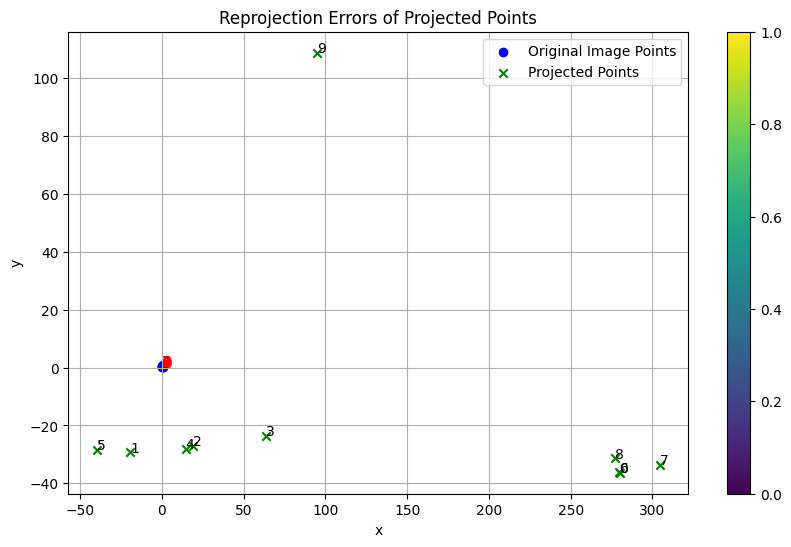

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 가상의 카메라 내부 파라미터 (실제 캘리브레이션 결과가 필요합니다)
fx = 430.13590678
fy = 291.83984574
cx = 132.49159782
cy = 11.06674187
camera_matrix = np.array([[fx, 0, cx],
                          [0, fy, cy],
                          [0, 0, 1]])

# 가상의 왜곡 계수 (실제 캘리브레이션 결과가 필요합니다)
k1 = -1.24553885
k2 = 6.41380543
p1 = 0.11199965
p2 = -0.03541538
k3 = -11.31623142
dist_coeffs = np.array([k1, k2, p1, p2, k3])

# 가상의 3D 점과 2D 점 데이터
object_points = np.random.random((10, 3))  # 10개의 임의의 3D 점
image_points = np.random.random((10, 2))   # 대응하는 임의의 2D 점

# 회전 및 이동 벡터
rvecs = [np.array([[-0.0693981], [-0.84251194], [-2.85628989]]),
         np.array([[-0.50434127], [-0.64059668], [-1.65893682]]),
         np.array([[-0.40508983], [-0.73355602], [-1.89773157]]),
         np.array([[-0.3664284], [-0.57021493], [-1.7725906]]),
         np.array([[-0.4253039], [-0.48567402], [-1.57749351]]),
         np.array([[-0.4725148], [-0.42870714], [-1.41840579]]),
         np.array([[-0.0693981], [-0.84251194], [-2.85628989]]),
         np.array([[-0.09525878], [0.86446958], [2.9138494]]),
         np.array([[-0.19660191], [0.81075478], [2.73801777]]),
         np.array([[-0.43746763], [0.37277063], [1.46953996]])]

tvecs = [np.array([[45.6253812], [-23.7163097], [106.91103761]]),
         np.array([[-33.83102915], [-14.72728316], [86.39896273]]),
         np.array([[-22.96540112], [-11.66292005], [78.18866538]]),
         np.array([[-19.10003354], [-14.73098223], [112.8852677]]),
         np.array([[-34.20642879], [-17.91030655], [112.28795228]]),
         np.array([[-48.45123628], [-19.77535703], [109.84494783]]),
         np.array([[45.6253812], [-23.7163097], [106.91103761]]),
         np.array([[64.23538254], [-29.92699156], [117.36143777]]),
         np.array([[76.54471513], [-41.68961305], [128.90386539]]),
         np.array([[33.38527754], [-134.92408281], [172.71980532]])]

# 재사영 오차 계산
mean_error = 0
errors = []

for i in range(len(object_points)):
    imgpoints2, _ = cv2.projectPoints(object_points[i].reshape(-1, 1, 3), rvecs[i], tvecs[i], camera_matrix, dist_coeffs)
    error = cv2.norm(image_points[i].reshape(-1, 2), imgpoints2.reshape(-1, 2), cv2.NORM_L2) / len(imgpoints2)
    errors.append(error)
    mean_error += len(object_points)
    print(f"Mean reprojection error: {mean_error}")

# 오차 시각화
plt.figure(figsize=(10, 6))
plt.scatter(image_points[:, 0], image_points[:, 1], c='blue', label='Original Image Points')
for i, point in enumerate(image_points):
    plt.text(point[0], point[1], str(i), color="red")
    projected_points = np.array([cv2.projectPoints(obj_pt.reshape(-1, 1, 3), rvecs[i], tvecs[i], camera_matrix, dist_coeffs)[0].reshape(-1, 2) for i, obj_pt in enumerate(object_points)])
for i, point in enumerate(projected_points):
    plt.scatter(point[:, 0], point[:, 1], c='green', marker='x')
    plt.text(point[0][0], point[0][1], str(i), color="black")

plt.colorbar()
plt.title('Reprojection Errors of Projected Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Original Image Points', 'Projected Points'])
plt.grid(True)
plt.show()
